# <font color='blue'>Introdução à Linguagem de programação Python</font>

#### Informática Biomédica
#### Universidade Federal de Ciências da Saúde de Porto Alegre - UFCSPA  
  

<img src=https://cdn-images-1.medium.com/max/1600/0*17G8RRzpccm_7F0U.png width="400">

**Disciplina optativa ministrada por:**
* **Profa. Viviane Rodrigues Botelho**
* **Profa. Ana Trindade Winck**

----



# <font color=red> Membros do grupo (até 3 pessoas):
 Alexandre Lemos, Bianca Bernardi
  

# <font color=red>Trabalho 2
Os dados contidos no arquivo **insurance.csv** contém informações referentes a  despesas médicas individuais cobradas pelo seguro saúde de beneficiário nos EUA. Estão contidos no arquivo os seguintes dados:

- Idade: idade do beneficiário principal.
- Sexo: sexo do beneficiário principal.
- IMC: índice de massa corporal do beneficiário principal.
- Filhos: número de filhos cobertos pelo planos
- Fumante: beneficiário principal é fumante?
- Encargos: valor dos encargos cobrados (em dólar).

Dataset adaptado de: https://www.kaggle.com/mirichoi0218/insurance
 
    
---

## Questão 1: Peso 2,5
- Importe o arquivo 'insurance.csv' na forma de dataframe, dando o nome de **DF1**
<br>

- Utilizando as funcionalidades do Pandas (**isto é, sem usar "for" ou "if"**):
    - Exiba os dez últimos elementos do **DF1**
    - Imprima o número de colunas do DataFrame
    - Imprima a média e o desvio padrão da coluna Idade. **Utilize o numpy para fazer os cálculo**.
    - Exiba os principais parâmeros estatísticos do DF1 usando a função apropriada do Pandas.
<br>
 
- Inclua no **DF1** chamada **Taxa por pessoa** contendo o o resultado do seguinte cálculo:
\begin{equation}
\frac{Taxas}{Filhos + 1}
\end{equation}
<br>
- Utilizando as funcionalidades do Pandas (**isto é, sem usar "for" ou "if"**), modifique o conteúdo da coluna **Fuma** substituindo **yes** por **1** e **no** por **0** 
<br>

- Utilizando os comandos de filtragem do Pandas (**isto é, sem usar "for" ou "if"**), indique o número de indivíduos com idade superior a 30 anos.

In [ ]:
import pandas as pd
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/5semestre/Python/2022/Trabalho2/insurance.csv", sep=';')
df1

,Idade,Sexo,IMC,Filhos,Fuma,Taxas
0,19,feminino,27.900,0,yes,16884.92400
1,18,masculino,33.770,1,no,1725.55230
2,28,masculino,33.000,3,no,4449.46200
3,33,masculino,22.705,0,no,21984.47061
4,32,masculino,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,masculino,30.970,3,no,10600.54830
1334,18,feminino,31.920,0,no,2205.98080
1335,18,feminino,36.850,0,no,1629.83350
1336,21,feminino,25.800,0,no,2007.94500


In [ ]:
#Exiba os dez últimos elementos do DF1
df1.tail(10)

,Idade,Sexo,IMC,Filhos,Fuma,Taxas
1328,23,feminino,24.225,2,no,22395.74424
1329,52,masculino,38.600,2,no,10325.20600
1330,57,feminino,25.740,2,no,12629.16560
1331,23,feminino,33.400,0,no,10795.93733
1332,52,feminino,44.700,3,no,11411.68500
1333,50,masculino,30.970,3,no,10600.54830
1334,18,feminino,31.920,0,no,2205.98080
1335,18,feminino,36.850,0,no,1629.83350
1336,21,feminino,25.800,0,no,2007.94500
1337,61,feminino,29.070,0,yes,29141.36030


In [ ]:
#Imprima o número de colunas do DataFrame
print(df1.shape[1])

6


In [ ]:
#Imprima a média e o desvio padrão da coluna Idade. Utilize o numpy para fazer os cálculo.
midade = np.mean(df1['Idade'])
didade = np.std(df1['Idade'])

print("Média das idades:",midade)
print("Desvio padrão:",didade)


#print("a média das idades é :", np.mean(df1['Idade']))

Média das idades: 39.20702541106129
Desvio padrão: 14.044709038954522


In [ ]:
#Exiba os principais parâmeros estatísticos do DF1 usando a função apropriada do Pandas.
print(df1.info());
print(df1.describe());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Idade   1338 non-null   int64  
 1   Sexo    1338 non-null   object 
 2   IMC     1338 non-null   float64
 3   Filhos  1338 non-null   int64  
 4   Fuma    1338 non-null   object 
 5   Taxas   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB
None
             Idade          IMC       Filhos         Taxas
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
#Inclua no DF1 chamada Taxa por pessoa contendo o o resultado do seguinte cálculo: taxas/filho+1
taxa = df1['Taxas']/((df1['Filhos'])+1)
df1['Taxa pessoa'] = taxa
print(df1)


      Idade       Sexo     IMC  Filhos Fuma        Taxas   Taxa pessoa
0        19   feminino  27.900       0  yes  16884.92400  16884.924000
1        18  masculino  33.770       1   no   1725.55230    862.776150
2        28  masculino  33.000       3   no   4449.46200   1112.365500
3        33  masculino  22.705       0   no  21984.47061  21984.470610
4        32  masculino  28.880       0   no   3866.85520   3866.855200
...     ...        ...     ...     ...  ...          ...           ...
1333     50  masculino  30.970       3   no  10600.54830   2650.137075
1334     18   feminino  31.920       0   no   2205.98080   2205.980800
1335     18   feminino  36.850       0   no   1629.83350   1629.833500
1336     21   feminino  25.800       0   no   2007.94500   2007.945000
1337     61   feminino  29.070       0  yes  29141.36030  29141.360300

[1338 rows x 7 columns]


In [ ]:
#Utilizando as funcionalidades do Pandas, modifique o conteúdo da coluna Fuma substituindo yes por 1 e no por 0
df1['Fuma']= df1['Fuma'].replace(['yes','no'],['1','0'])

print(df1)

      Idade       Sexo     IMC  Filhos Fuma        Taxas   Taxa pessoa
0        19   feminino  27.900       0    1  16884.92400  16884.924000
1        18  masculino  33.770       1    0   1725.55230    862.776150
2        28  masculino  33.000       3    0   4449.46200   1112.365500
3        33  masculino  22.705       0    0  21984.47061  21984.470610
4        32  masculino  28.880       0    0   3866.85520   3866.855200
...     ...        ...     ...     ...  ...          ...           ...
1333     50  masculino  30.970       3    0  10600.54830   2650.137075
1334     18   feminino  31.920       0    0   2205.98080   2205.980800
1335     18   feminino  36.850       0    0   1629.83350   1629.833500
1336     21   feminino  25.800       0    0   2007.94500   2007.945000
1337     61   feminino  29.070       0    1  29141.36030  29141.360300

[1338 rows x 7 columns]


In [ ]:
#Utilizando os comandos de filtragem do Pandas, indique o número de indivíduos com idade superior a 30 anos.
acima = df1.query('Idade > 30.00').count()

print(acima['Idade'])

894


## Questão 2: Peso (2,5)

**A)** Faça um gráfico de barras ilustrando o percentual de indivíduos em cada uma das classes ilustradas abaixo. Utilize as funcionalidades do Pandas (**isto é, sem usar "for" ou "if"**): 
 - IMC menor que 18,5: abaixo do peso
 - IMC entre 18,5 e 24,9 peso normal
 - IMC entre 25 e 29,9: sobrepeso
 - IMC maior do que 30: obesidade
<br>


**B)** Faça um subplot contendo dois gráficos de pizza (um do lado do outro). . Utilize as funcionalidades do Pandas (**isto é, sem usar "for" ou "if"**):
 - No primeiro gráfico deve ser ilustrando o percentual de indivíduos do sexo feminino e o percentual de indivíduos do sexo masculino
 - No segundo gráfico deverá ser ilustrado o percentual de indivíduos fumantes e percentual de indivíduos não fumantes.
 - Inclua títulos nos gráficos.
 
 
<font color=red> Obs: Sempre que aplicável, inclua nos gráficos legendas e títulos nos eixos.

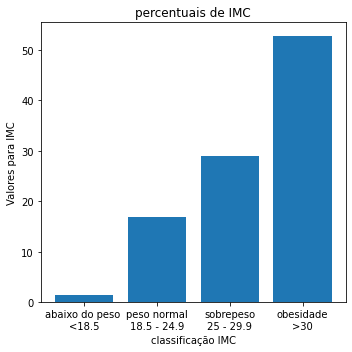

In [ ]:
#Faça um gráfico de barras ilustrando o percentual de indivíduos em cada uma das classes ilustradas abaixo.

abaixo = df1.query('IMC < 18.500')
normal = df1.query('IMC >= 18.500 & IMC <= 24.999')
sobrepeso = df1.query('IMC >= 25.000 & IMC <= 29.999')
obesidade = df1.query('IMC > 30.000')


x1=(abaixo['IMC'].count()*100) /1336
x2=(normal['IMC'].count()*100) /1336
x3=(sobrepeso['IMC'].count()*100) /1336
x4=(obesidade['IMC'].count()*100) /1336


plt.figure(figsize=(5,5))
plt.title('percentuais de IMC')
grupos = ['abaixo do peso \n<18.5', 'peso normal\n18.5 - 24.9', 'sobrepeso\n25 - 29.9', 'obesidade\n>30']
valores = [x1, x2, x3, x4]
plt.bar(grupos, valores)
plt.ylabel('Valores para IMC')
plt.xlabel('classificação IMC')
#plt.grid()
plt.tight_layout() 
plt.show()

([<matplotlib.patches.Wedge at 0x7fecf64137d0>,
 [Text(-0.8801026332278259, 0.6598631335250117, ''),
  Text(0.8801026332278258, -0.6598631335250118, '')])

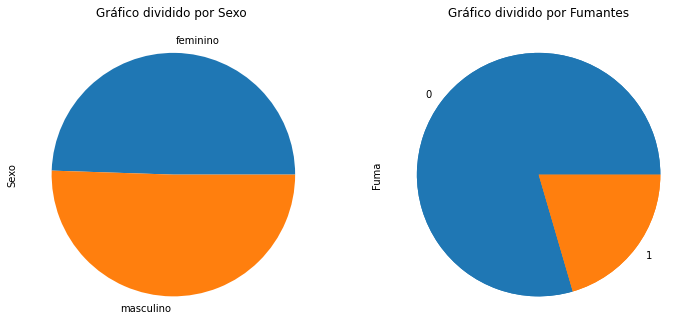

In [ ]:
#2B
plt.figure(figsize=(12,12))
plt.tight_layout()

plt.subplot(1,2,1)
plt.title('Gráfico dividido por Sexo ')
df1.groupby(['Sexo']).Sexo.count().plot(kind='pie')


plt.subplot(1,2,2)
plt.title('Gráfico dividido por Fumantes')
a = df1.groupby(['Fuma']).Fuma.count().plot(kind='pie')
b = df1.groupby(['Fuma']).Fuma.count()

#plt.pie(b, explode = none, labels = a)

plt.pie(b)
#plt.setp(autotexts, size=8, weight="bold")



## Questão 3: Peso (2,5)
- Crie um dataframe denominado **DF2** contendo apenas os dados dos indivíduos não fumantes e que não possuem filhos
- Utilizando a **função curve_fit do scipy** e os **dados do DF2** ajuste o seguinte modelo (onde *a*,*b* e *c* são os parâmetros de ajuste do modelo e as variáveis *taxa* e **idade** são os dados contidos no **DF2**:
\begin{equation}
taxa= a(idade)+b(idade)^2+\frac{c}{idade}
\end{equation}
<br>
- Faça um gráfico de dispersão, contendo os dados reais de taxa e os dados estimados pelo modelo.
<br>

<font color=red> Obs: Sempre que aplicável, inclua nos gráficos legendas e títulos nos eixos.

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
df2 = df1[(df1['Fuma']=='0')&(df1['Filhos']==0)]

print(df2['Fuma'])
print(df2['Filhos'])

#print(df2['Fuma'].count())
#print(df2['Filhos'].count())


3       0
4       0
5       0
9       0
10      0
       ..
1326    0
1331    0
1334    0
1335    0
1336    0
Name: Fuma, Length: 459, dtype: object
3       0
4       0
5       0
9       0
10      0
       ..
1326    0
1331    0
1334    0
1335    0
1336    0
Name: Filhos, Length: 459, dtype: int64


[  96.20022158    2.13866431 1992.82635557]


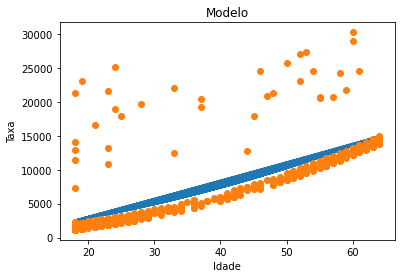

In [ ]:
def x(idade,a,b,c):
  return a*idade+b*idade**2+(c/idade)

t = curve_fit(x, df2['Idade'], df2['Taxas']);
print(t[0])

novaTaxa = x(df2['Idade'], t[0][0], t[0][1], t[0][2])

plt.plot(df2['Idade'],novaTaxa, label= 'Dado estimado')
plt.plot(df2['Idade'], df2['Taxas'], 'o', label = 'Dado real')

plt.title('Modelo')
plt.xlabel('Idade')
plt.ylabel('Taxa')
plt.show()

## Questão 4: Peso (2,5)
Crie um novo Dataframe com 50 linhas hipotéticas:
- A coluna **idade** deve conter valores aleatórios entre 20 e 80 (inteiros).
- A coluna **filhos** deve conter valores aleatórios entre 0 e 5 (inteiros).
- A coluna **imc** deve conter valores aleatórios entre 16 e 40 (float).
- A coluna **taxa** deve conter o resultado do cálculo abaixo, utilizando os dados hipotéticos gerados.
<br>

\begin{equation}
taxa= 100(idade +5(filhos) + 1.5(IMC))
\end{equation}
<br>

- Salvar o dataframe gerado no formado .csv.

In [ ]:
from numpy import random
4#
idade = list(random.randint(20,80, size=(50)))
#print(idade)
filhos = list(random.randint(0,5, size=(50)))
#print(filhos)
imc = list(random.uniform(14.0, 40, size=(50)))
#print(imc)

list_of_tuples = list(zip(idade,filhos,imc))
df = pd.DataFrame(list_of_tuples, columns = ['Idade', 'Filhos','IMC'])
df = df.eval('Taxa = 100*(Idade+(5*Filhos)+(1.5*IMC))')

print(df)


    Idade  Filhos        IMC          Taxa
0      30       2  35.715190   9357.278510
1      59       2  15.245860   9186.879023
2      50       3  14.690042   8703.506358
3      42       2  17.087271   7763.090639
4      30       0  30.907715   7636.157318
5      28       4  34.486397   9972.959576
6      71       2  23.546111  11631.916576
7      23       1  29.388331   7208.249603
8      33       1  20.008938   6801.340702
9      29       0  34.984429   8147.664322
10     76       4  39.828895  15574.334317
11     55       1  20.906002   9135.900373
12     77       4  33.720812  14758.121851
13     66       2  20.420485  10663.072786
14     53       2  19.338822   9200.823312
15     44       0  18.710948   7206.642145
16     75       3  19.182553  11877.383021
17     33       3  34.050198   9907.529685
18     41       4  21.633764   9345.064535
19     33       1  25.332703   7599.905451
20     35       3  30.709952   9606.492797
21     61       1  29.200767  10980.114994
22     61  

In [ ]:
#df.to_csv(index=False)
df.to_csv("/content/drive/MyDrive/5semestre/Python/2022/Trabalho2/questao4.csv",';')


